<a href="https://colab.research.google.com/github/codm12112/SIT-PROJECT/blob/main/HousingDB_by_CommunityCityDistrict_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/HousingDB_by_CommunityDistrict.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Get information about the DataFrame
print("\nInformation about the dataset:")
print(df.info())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Check for missing values
print("\nNumber of missing values per column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   commntydst  comp2020ap  comp2010  comp2011  comp2012  comp2013  comp2014  \
0         101         246       460      1598       503       416       -11   
1         102         327       231       -22       -94       -37       -10   
2         103         311       592       122        70       184       422   
3         104         276      1877      1987       298      2496       731   
4         105         235       527       320       -13       147       277   

   comp2015  comp2016  comp2017  ...  comp2021  comp2022  comp2023  comp2024  \
0       850      1174      1257  ...       840        27       594       282   
1       212       466       108  ...       245       186         3         2   
2        56       290       656  ...       181       379       539        50   
3      1653      1706      2110  ...       472      2250       382       843   
4       535       543       731  ...       237       472       557        -4   

   cenunits20  

In [2]:
# Calculate and display summary statistics
print("\nSummary statistics for the dataset:")
print(df.describe())


Summary statistics for the dataset:
       commntydst   comp2020ap     comp2010     comp2011     comp2012  \
count   71.000000    71.000000    71.000000    71.000000    71.000000   
mean   297.169014   241.253521   331.267606   252.140845   148.887324   
std    127.266311   303.293715   476.483007   361.600897   214.256758   
min    101.000000   -17.000000     0.000000   -22.000000  -119.000000   
25%    205.500000    16.500000    57.500000    40.500000    13.000000   
50%    308.000000   152.000000   216.000000   135.000000    84.000000   
75%    405.500000   308.500000   383.500000   307.500000   211.000000   
max    595.000000  1427.000000  3044.000000  1987.000000  1199.000000   

          comp2013     comp2014     comp2015     comp2016     comp2017  ...  \
count    71.000000    71.000000    71.000000    71.000000    71.000000  ...   
mean    205.028169   175.450704   219.577465   334.295775   372.197183  ...   
std     445.795884   285.429340   374.130217   475.342775   601.8715

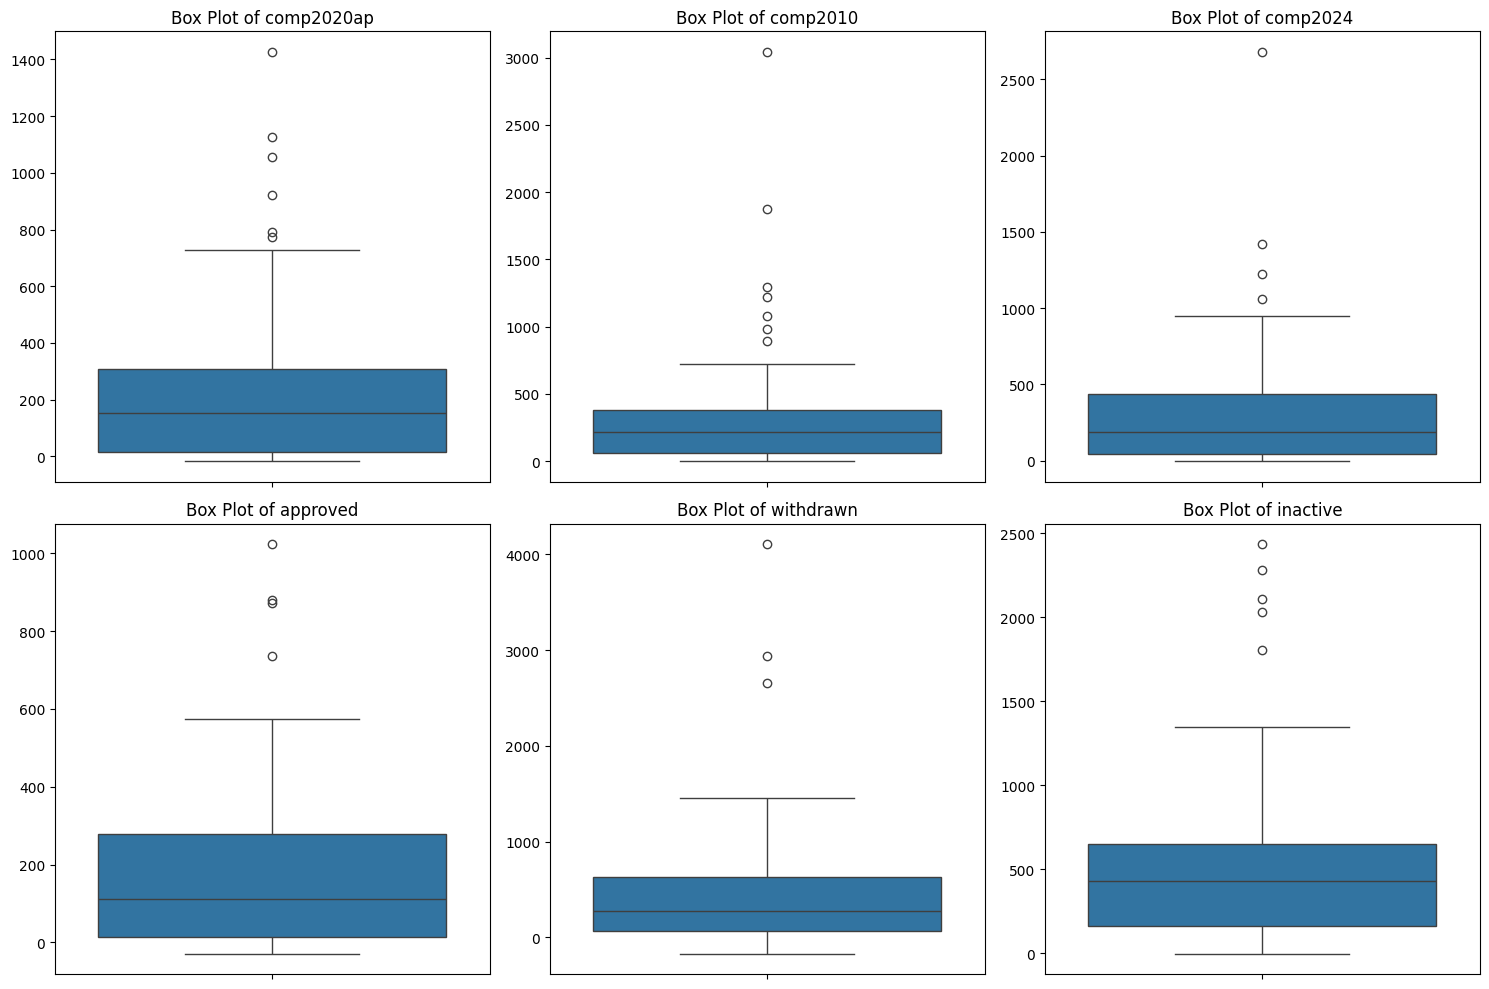

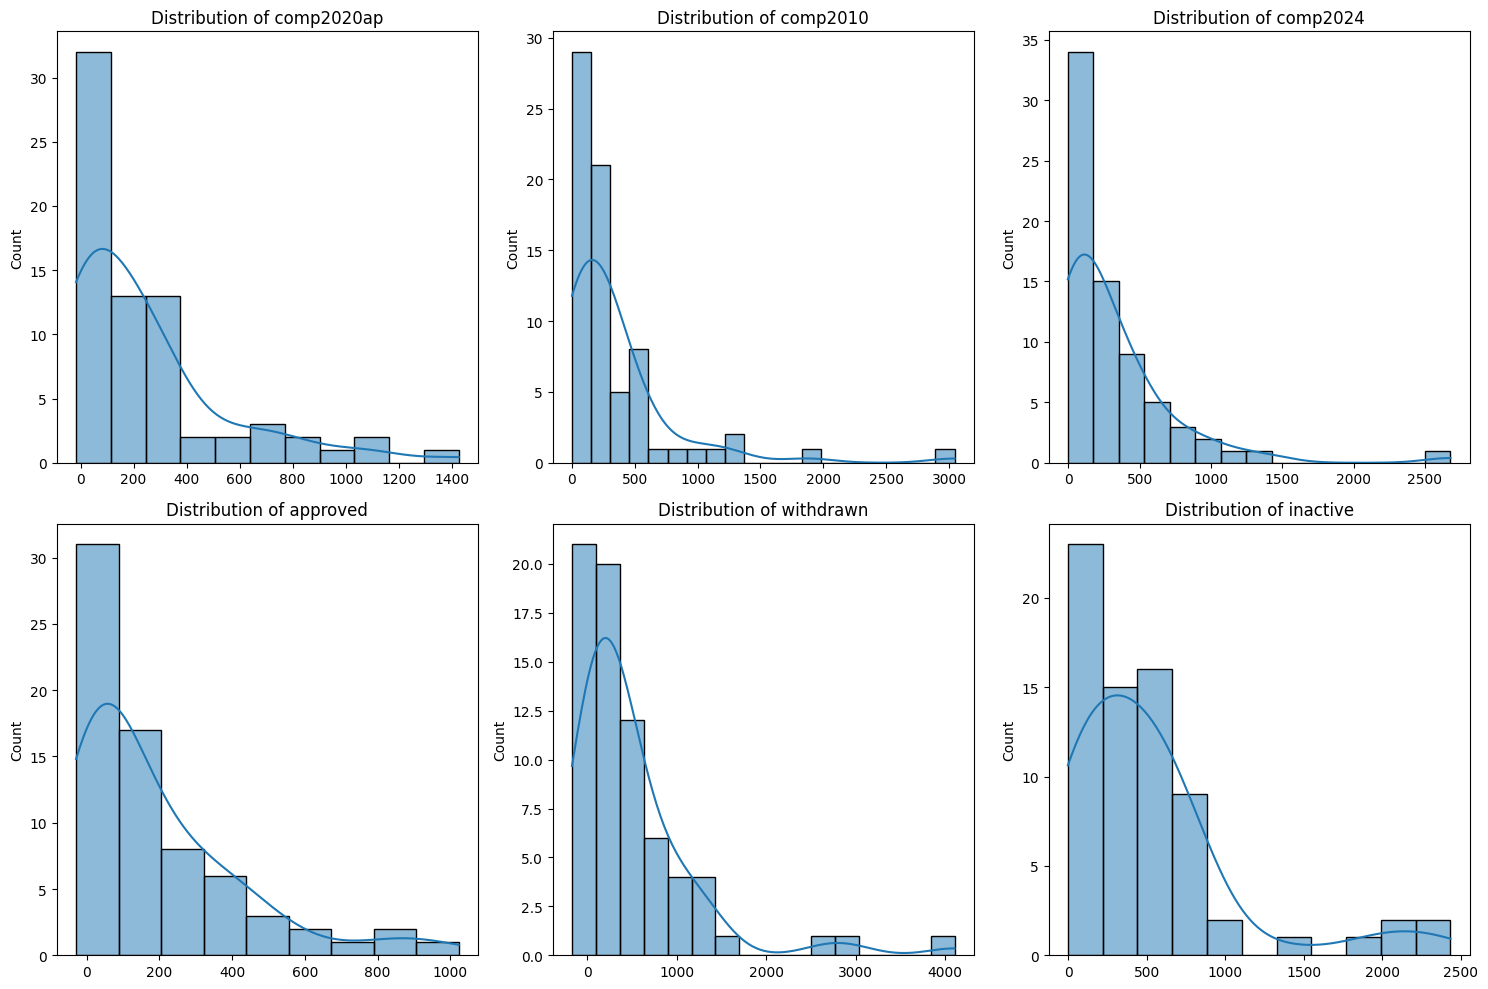

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns for plotting
plot_cols = ['comp2020ap', 'comp2010', 'comp2024', 'approved', 'withdrawn', 'inactive']

# Create box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(plot_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.savefig('box_plots.png')
plt.show()

# Create histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(plot_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

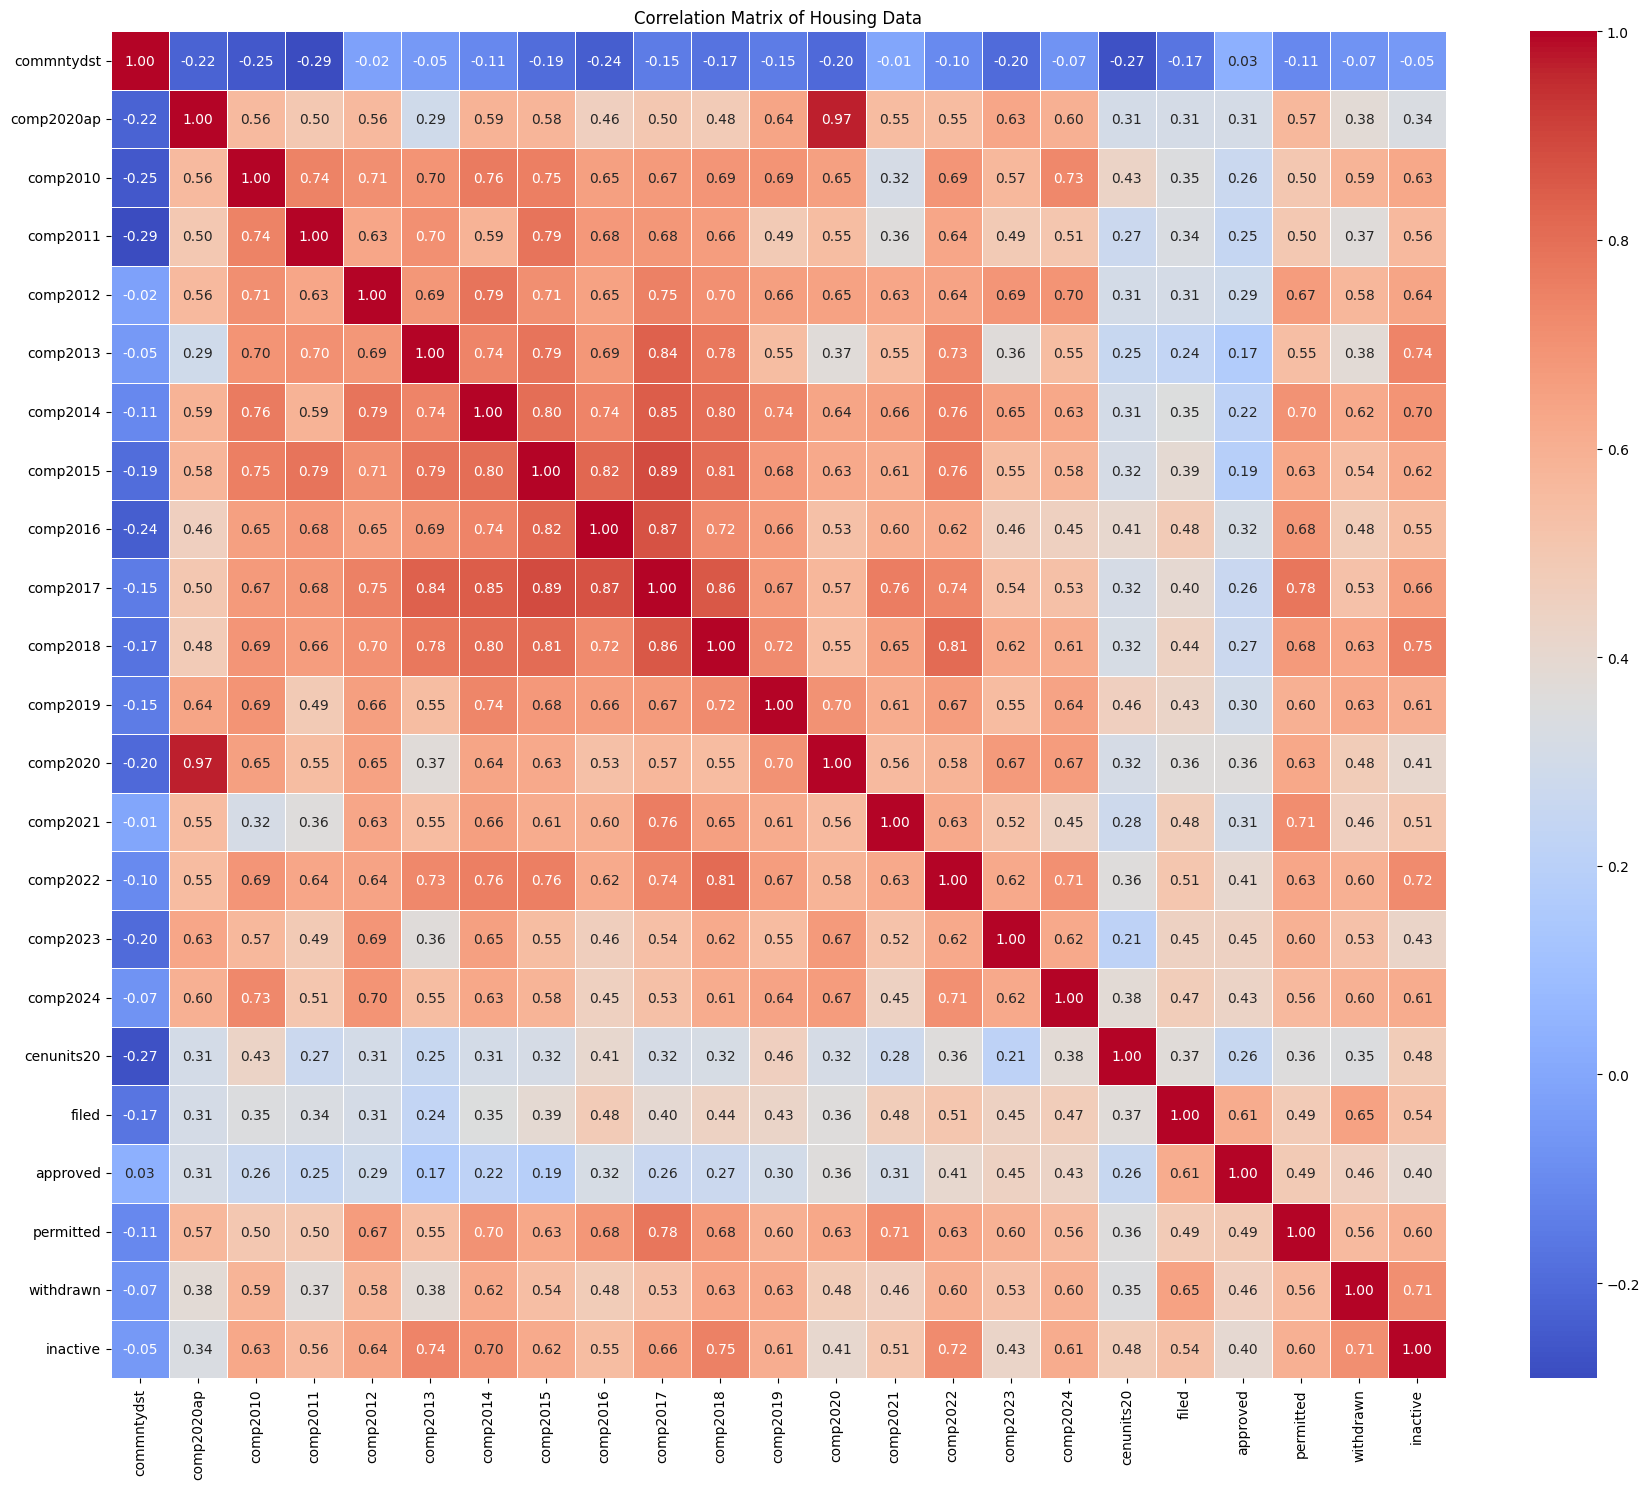

In [4]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Housing Data')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

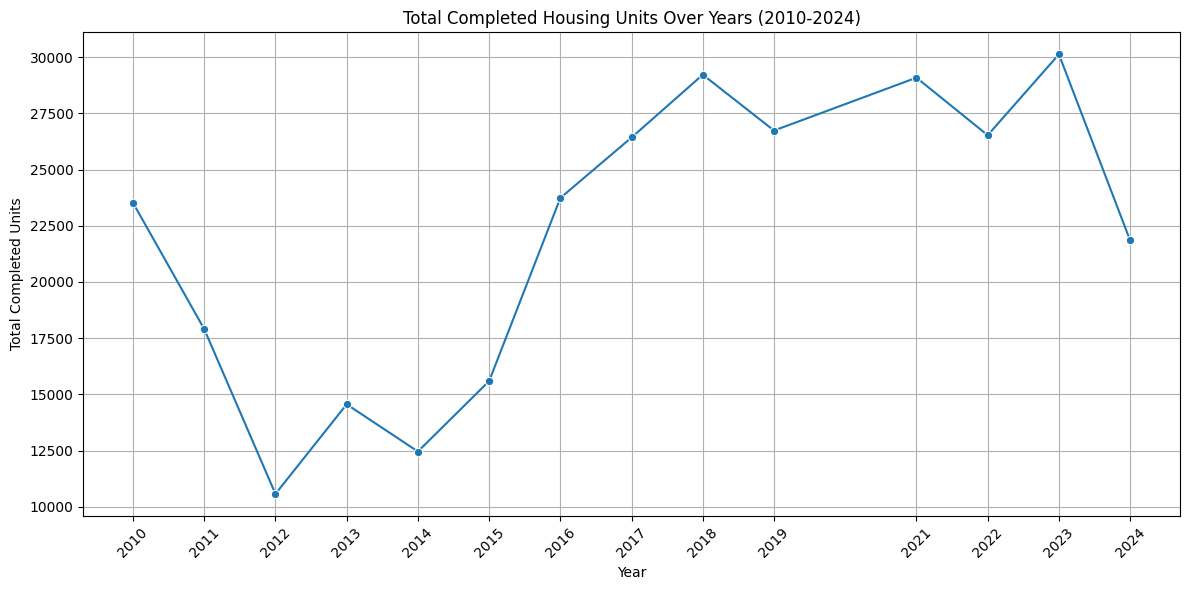

In [5]:
# Select columns related to completed units over years (comp2010 to comp2024)
comp_columns = [col for col in df.columns if col.startswith('comp') and col not in ['comp2020ap', 'comp2020']]
comp_columns.sort() # Sort columns to ensure chronological order

# Calculate total completed units per year
yearly_completed_units = df[comp_columns].sum()

# Extract years from column names
years = [int(col.replace('comp', '')) for col in yearly_completed_units.index]

# Create a DataFrame for plotting
yearly_data = pd.DataFrame({'Year': years, 'Total_Completed_Units': yearly_completed_units.values})

# Plotting the trend of completed units over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total_Completed_Units', data=yearly_data, marker='o')
plt.title('Total Completed Housing Units Over Years (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Total Completed Units')
plt.grid(True)
plt.xticks(yearly_data['Year'], rotation=45) # Ensure all years are visible on x-axis
plt.tight_layout()
plt.savefig('total_completed_units_trend.png')
plt.show()